In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
import re

sns.set(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (12, 6)

# Update with your actual folder names
# (If "abdulhaq1" is the correct name, change it below)
participant_folders = ['processed/abdulhadi1', 'processed/awan1']  


In [ ]:
def load_participant_data(folder):
    """Load all processed CSV files for a participant."""
    files = glob(os.path.join(folder, '*_processed.csv'))
    df_list = []
    
    for f in files:
        # Filename example: d1_INSIGHT2_260262_2025.01.04T14.23.07+05.00_processed.csv
        filename = os.path.basename(f)
        
        # Label is just the first character (e.g., 'd', 'u', 'i', 'r', 'l')
        label = filename[0]
        
        # Extract the trial number from something like "d1" or "d2"
        # If your naming isn’t consistent, adjust this regex
        match = re.search(r'^(\D+)(\d+)', filename)
        if not match:
            # If no match, skip this file or handle differently
            continue
        trial_num = match.group(2)
        
        # Read the CSV
        df = pd.read_csv(f)
        
        # Add columns for label, participant, and trial
        df['Label'] = label
        df['Participant'] = os.path.basename(folder)
        df['Trial'] = int(trial_num)
        
        df_list.append(df)
    
    if not df_list:
        return pd.DataFrame()  # Return empty if no files
    
    # Concatenate all data from this participant
    participant_df = pd.concat(df_list, ignore_index=True)
    return participant_df

# Load data from all participants
dfs = []
for folder in participant_folders:
    part_data = load_participant_data(folder)
    dfs.append(part_data)

full_df = pd.concat(dfs, ignore_index=True)

# Remove any duplicate columns if they exist
full_df = full_df.loc[:, ~full_df.columns.duplicated()].copy()

# Strip any stray spaces from column names
full_df.columns = full_df.columns.str.strip()

# Ensure the DataFrame has a consistent index
full_df.reset_index(drop=True, inplace=True)

# Quickly inspect
print("DataFrame shape:", full_df.shape)
print("Columns:", full_df.columns.tolist())
print(full_df[['Participant','Label','Trial']].head(100000))


'''The provided code snippet is a function `load_participant_data(folder)` and a subsequent routine to aggregate data from participant-specific folders. Here's a concise description of 
what the code does:

1. **Function `load_participant_data`**: 
   - **Purpose**: To load all processed CSV files for a specific participant from a given folder.
   - **Process**:
     - It uses the `glob` module to find all CSV files in the specified `folder` that have filenames ending with `_processed.csv`.
     - It initializes an empty list `df_list` to store DataFrames.
     - For each found file:
       - Extracts the base filename and deduces the label (first character) and trial number (using regex).
       - If a filename does not match the expected pattern (e.g., no trial number extracted), it skips processing that file.
       - Reads the CSV into a DataFrame, adding metadata columns for 'Label', 'Participant', and 'Trial'.
     - If no DataFrames were created (i.e., no valid files were processed), it returns an empty DataFrame.
     - Otherwise, it concatenates all the DataFrames in `df_list` into a single DataFrame `participant_df` and returns it.

2. **Loading Data for All Participants**:
   - Iterates over a list of folders corresponding to different participants (`participant_folders`).
   - Calls the `load_participant_data` function for each folder, appending the returned DataFrame to a list `dfs`.
   - Concatenates all DataFrames in `dfs` into a single DataFrame `full_df` to aggregate data from all participants.

3. **Post-Processing**:
   - It removes any duplicate column names that may have resulted from concatenation.
   - It uses `str.strip()` to remove any stray spaces from column names.
   - Resets the DataFrame index to ensure a consistent, ordered index starting from zero.

4. **Quick Inspection**:
   - It prints the shape (dimensions) of the combined `full_df`.
   - It prints the names of the columns, providing an overview of the dataset structure.
   - Finally, it prints the first few rows (up to 100,000) of the DataFrame, specifically the columns 'Participant', 'Label', and 'Trial', to give a brief look at the imported data.

This code efficiently organizes the importing, processing, and aggregation of participant-specific EEG data stored as CSV files, making it ready for subsequent analysis and visualization.'''


DataFrame shape: (105803, 70)
Columns: ['Timestamp', 'OriginalTimestamp', 'EEG.Counter', 'EEG.Interpolated', 'EEG.AF3', 'EEG.T7', 'EEG.Pz', 'EEG.T8', 'EEG.AF4', 'EEG.RawCq', 'EEG.Battery', 'EEG.BatteryPercent', 'MarkerIndex', 'MarkerType', 'MarkerValueInt', 'EEG.MarkerHardware', 'CQ.AF3', 'CQ.T7', 'CQ.Pz', 'CQ.T8', 'CQ.AF4', 'CQ.Overall', 'MOT.CounterMems', 'MOT.InterpolatedMems', 'MOT.Q0', 'MOT.Q1', 'MOT.Q2', 'MOT.Q3', 'MOT.AccX', 'MOT.AccY', 'MOT.AccZ', 'MOT.MagX', 'MOT.MagY', 'MOT.MagZ', 'POW.AF3.Theta', 'POW.AF3.Alpha', 'POW.AF3.BetaL', 'POW.AF3.BetaH', 'POW.AF3.Gamma', 'POW.T7.Theta', 'POW.T7.Alpha', 'POW.T7.BetaL', 'POW.T7.BetaH', 'POW.T7.Gamma', 'POW.Pz.Theta', 'POW.Pz.Alpha', 'POW.Pz.BetaL', 'POW.Pz.BetaH', 'POW.Pz.Gamma', 'POW.T8.Theta', 'POW.T8.Alpha', 'POW.T8.BetaL', 'POW.T8.BetaH', 'POW.T8.Gamma', 'POW.AF4.Theta', 'POW.AF4.Alpha', 'POW.AF4.BetaL', 'POW.AF4.BetaH', 'POW.AF4.Gamma', 'EQ.SampleRateQuality', 'EQ.OVERALL', 'EQ.AF3', 'EQ.T7', 'EQ.Pz', 'EQ.T8', 'EQ.AF4', 'Relative

/var/folders/w6/shcrz9jd6xsbs8kqwdk_j0wh0000gn/T/ipykernel_35568/868384827.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  participant_df = pd.concat(df_list, ignore_index=True)
/var/folders/w6/shcrz9jd6xsbs8kqwdk_j0wh0000gn/T/ipykernel_35568/868384827.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  participant_df = pd.concat(df_list, ignore_index=True)


Trial Distribution:
 Label         d   i   l  r   u
Participant                   
abdulhadi1   11  10  11  6  11
awan1        13   0  12  2  12


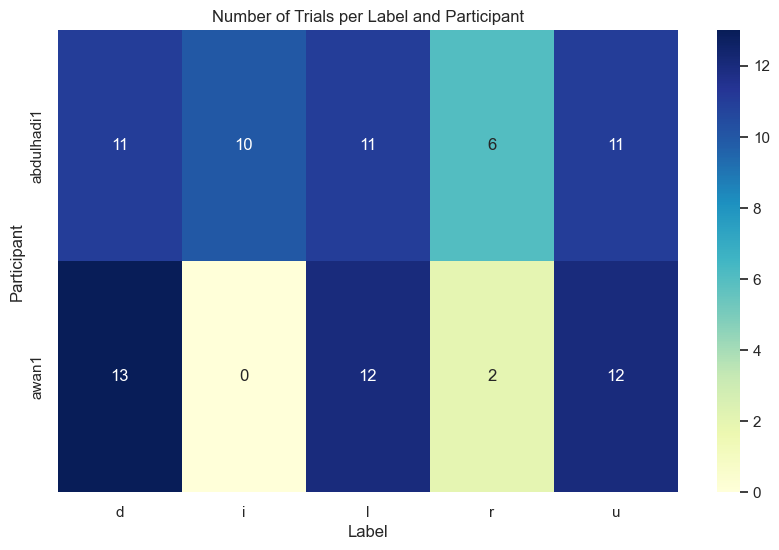

In [ ]:
# 2.1. Trial Distribution
trial_dist = (
    full_df
    .groupby(['Participant', 'Label'])['Trial']
    .nunique()             # unique trial numbers
    .unstack(fill_value=0) # fill missing label with 0
)
# Convert float->int if desired
trial_dist = trial_dist.astype(int)
print("Trial Distribution:\n", trial_dist)

plt.figure(figsize=(10,6))
sns.heatmap(trial_dist, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Number of Trials per Label and Participant')
plt.show()

'''### Purpose:
The code aims to visualize the **number of unique trials** for each combination of **participant** and **label** (e.g., 'd', 'u', 'i', 'r', 'l') in your dataset. 

### Step-by-Step Explanation:

1. **Grouping and Counting Trials**:
   - `full_df.groupby(['Participant', 'Label'])['Trial'].nunique()`: This part groups the dataset by 'Participant' and 'Label'. For each grouping, it calculates the number of unique 
   trial IDs using `nunique()`. This gives the count of distinct trials for each label for each participant.
   - `unstack(fill_value=0)`: The result from the grouping is reshaped such that each participant has a row and each label has a column. If a participant does not have any trials for 
   a particular label, `fill_value=0` fills those missing entries with 0 instead of NaN.

2. **Conversion to Integer**:
   - `trial_dist.astype(int)`: Converts the resulting DataFrame from floating-point numbers (which may occur if there were missing entries filled by 0) to integer type for cleaner presentation.

3. **Visualization with Heatmap**:
   - `sns.heatmap(trial_dist, annot=True, cmap='YlGnBu', fmt='d')`: Creates a heatmap visualization of the `trial_dist` DataFrame:
     - **`annot=True`:** Annotates each cell of the heatmap with the numeric count of trials.
     - **`cmap='YlGnBu'`:** Uses a color map that ranges from yellow-green to blue, where typically lighter colors (e.g., yellow) signify lower values, and darker colors (blue) 
     signify higher values.
     - **`fmt='d'`:** Specifies that the annotation is formatted as integers (since numbers of trials are whole numbers).

4. **Output**:
   - **Table in Console:** You get a printout of the number of trials for each participant and label.
   - **Heatmap Visualization:** The heatmap visually displays the number of trials per participant and label, with color intensity representing the count. This visualization makes 
   it easy to spot patterns or discrepancies, such as:
     - Whether any participant has missing data for a particular label.
     - If the trials are fairly evenly distributed across labels for each participant.
     - Identify if there are any participants or labels with particularly low or high numbers of trials.

Overall, this code provides a clear and quick way to assess the trial distribution across the different conditions and participants in your experiment, which is foundational 
for ensuring that your dataset is balanced and that analyses are valid and reliable.'''

In [ ]:
# 2.2. Session Duration Analysis
# Some participants may be missing certain labels entirely, leading to NaN in times
if 'RelativeTimestamp' in full_df.columns:
    duration_stats = (
        full_df
        .groupby(['Participant', 'Label'])['RelativeTimestamp']
        .agg(
            min_duration=('min'),
            max_duration=('max'),
            mean_duration=('mean')
        )
    )
    print("\nTrial Duration Statistics:")
    print(duration_stats)
else:
    print("\nNo 'RelativeTimestamp' column found.")
    
'''This code segment analyzes the duration of sessions for each combination of participant and label in the dataset by examining the 'RelativeTimestamp' column, if it exists. 
Here's a brief breakdown:

1. **Check for 'RelativeTimestamp'**: 
   - The code first checks if the 'RelativeTimestamp' column is present in `full_df`. This column presumably contains time information for the data.

2. **Calculate Duration Statistics**:
   - If 'RelativeTimestamp' exists, the code groups the data by 'Participant' and 'Label', and calculates three statistics for 'RelativeTimestamp':
     - `min_duration`: The earliest timestamp value, indicating the start of the session.
     - `max_duration`: The latest timestamp value, indicating the end of the session.
     - `mean_duration`: The average timestamp value across the grouped data, giving an average time point during the sessions.

3. **Output Results**:
   - Prints the calculated duration statistics, which show session start, end, and average timing for each participant-label pair, helping assess timing consistency or 
   discrepancies in data recording.

If 'RelativeTimestamp' is not found, it simply informs you with a message.'''


Trial Duration Statistics:
                   min_duration  max_duration  mean_duration
Participant Label                                           
abdulhadi1  d          0.000000      9.997321       4.998659
            i         11.004854     20.994373      15.883133
            l          0.000000      9.997320       4.998659
            r         15.003781     24.993297      19.799426
            u          3.007005     12.996516       7.615632
awan1       d          0.000000      9.996690       4.998278
            l          0.000000      9.996741       4.998320
            r         15.002476     17.181807      16.069217
            u          3.006633     12.995694       7.431130


In [ ]:
# ## 3. Signal Quality Analysis

# %%
# 3.1. Contact Quality (CQ)
cq_cols = [c for c in full_df.columns if c.startswith('CQ.')]
if cq_cols:
    plt.figure(figsize=(15,6))
    for i, participant in enumerate(participant_folders, 1):
        # Subset for each participant
        subset = full_df[full_df['Participant'] == participant]
        if subset.empty:
            continue
        
        plt.subplot(1, len(participant_folders), i)
        sns.boxplot(data=subset[cq_cols])
        plt.title(f'{participant} - Contact Quality')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No 'CQ.*' columns found for signal quality visualization.")
    
    
'''This code snippet performs the following tasks:

1. **Identify CQ Columns**: It finds all columns in the DataFrame that start with 'CQ.', which presumably relate to Contact Quality metrics.

2. **Check Existence**: If 'CQ.*' columns exist, it proceeds with plotting; otherwise, it outputs a message stating that no 'CQ.*' columns were found.

3. **Plotting**: For each participant, it:
   - Checks if there is data available (i.e., the subset is not empty).
   - Creates a separate boxplot displaying the distribution of Contact Quality values across identified CQ columns, facilitating assessment of signal quality for each participant.
   - Each participant gets a subplot if data is available, displayed side-by-side.

These plots help visualize the consistency and variability in contact quality for different data acquisition sessions.'''

<Figure size 1500x600 with 0 Axes>

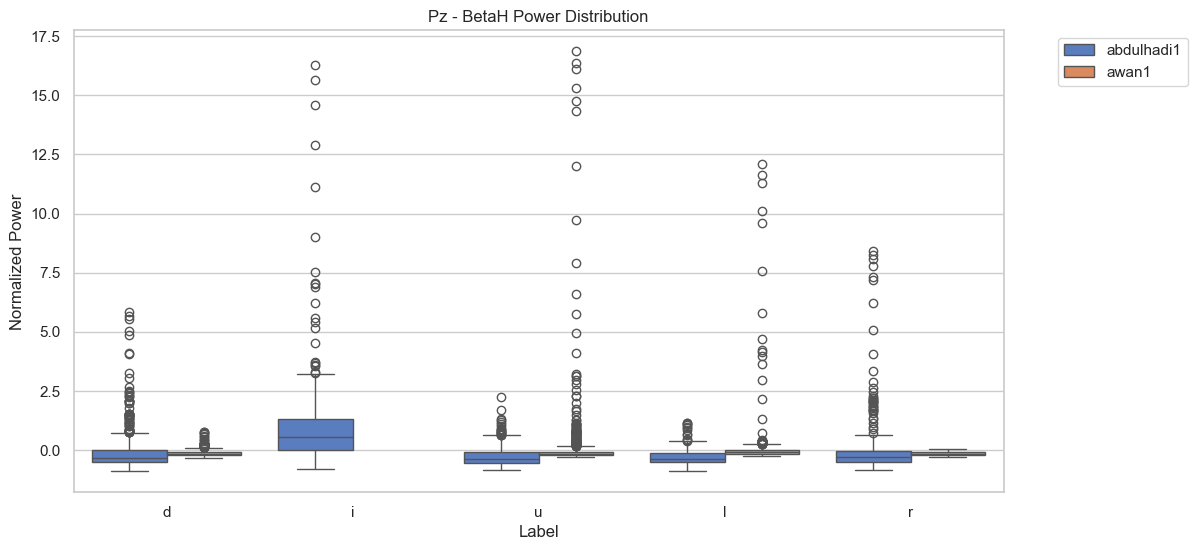

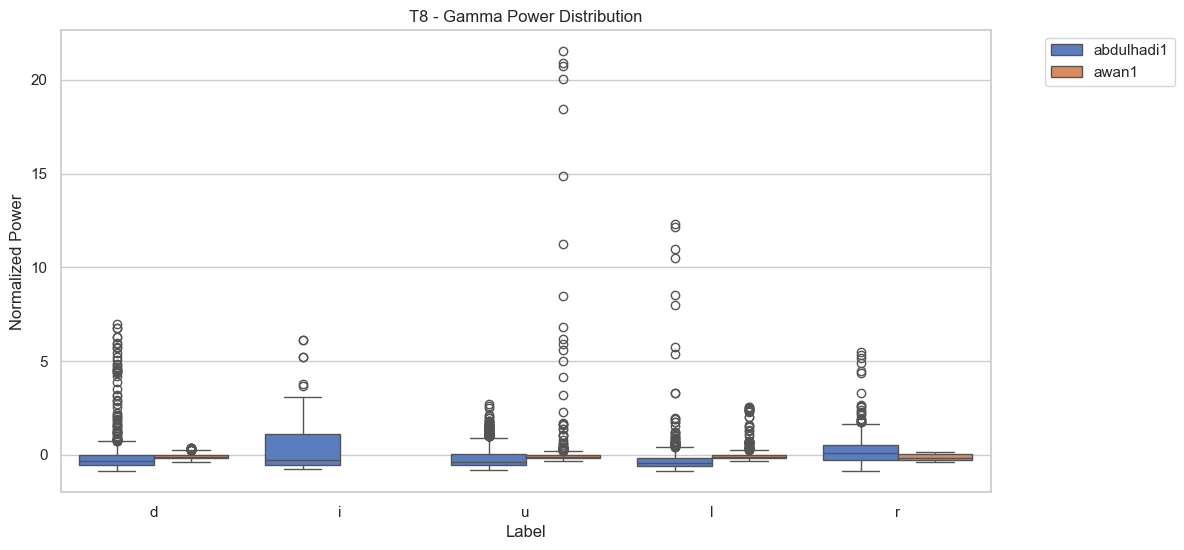

In [ ]:
# ## 4. Power Band Analysis

# %%
# 4.1. Identify all power band columns
power_bands = [c for c in full_df.columns if c.startswith('POW.')]

# If there are no power band columns, skip
if not power_bands:
    print("No power band columns found. Skipping power band analysis.")
else:
    # Fill or drop NaNs for these columns. One option is to drop rows that are entirely NaN in power bands:
    full_df.dropna(subset=power_bands, how='all', inplace=True)
    
    # Alternatively, fill missing with 0 or some strategy
    full_df[power_bands] = full_df[power_bands].fillna(0)
    
    # 4.2. Normalize power bands within each participant (Z-score)
    full_df[power_bands] = (
        full_df
        .groupby('Participant')[power_bands]
        .transform(lambda x: (x - x.mean()) / x.std(ddof=1))
    )

    # Function to boxplot a given (electrode, band)
    def plot_power_comparison(electrode='AF3', band='Alpha'):
        col = f'POW.{electrode}.{band}'
        if col not in full_df.columns:
            print(f"Column {col} not found.")
            return
        
        plt.figure(figsize=(12,6))
        sns.boxplot(x='Label', y=col, hue='Participant', data=full_df)
        plt.title(f'{electrode} - {band} Power Distribution')
        plt.ylabel('Normalized Power')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()
    
    # Example usage
    plot_power_comparison('Pz', 'BetaH')
    plot_power_comparison('T8', 'Gamma')
    
'''This code snippet performs power band analysis on EEG data:

1. **Identify Power Band Columns**: It collects all columns starting with 'POW.' which relate to power band metrics.

2. **Handle Missing Data**:
   - If no power band columns exist, it prints a message and skips analysis.
   - Otherwise, it drops rows entirely NaN in power bands, or fills NaNs with 0.

3. **Normalize Data**: 
   - It applies Z-score normalization to power band columns within each participant to standardize the data.

4. **Plotting Function**: 
   - Defines `plot_power_comparison` to create boxplots of normalized power distribution for a specific electrode-band combination, distinguishing by label and participant.
   - Example plots are generated for 'Pz-BetaH' and 'T8-Gamma' power distributions.

This analysis helps visualize and compare power band distributions across different conditions and participants.'''


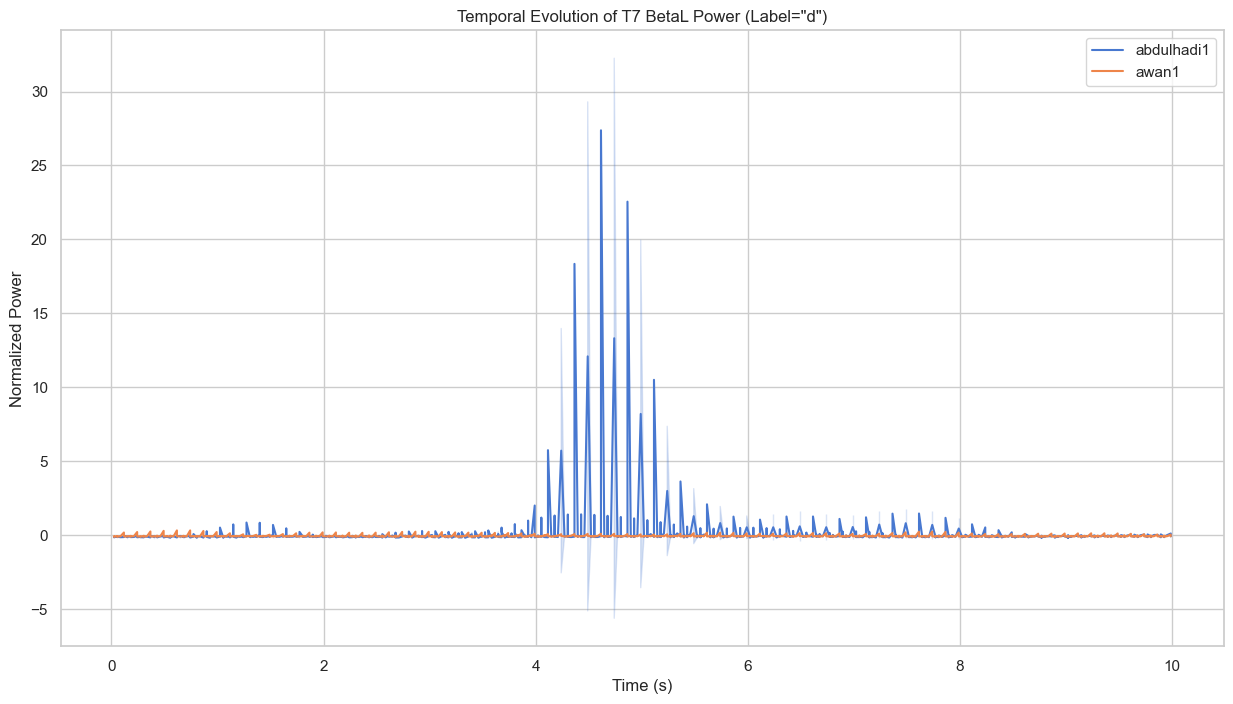

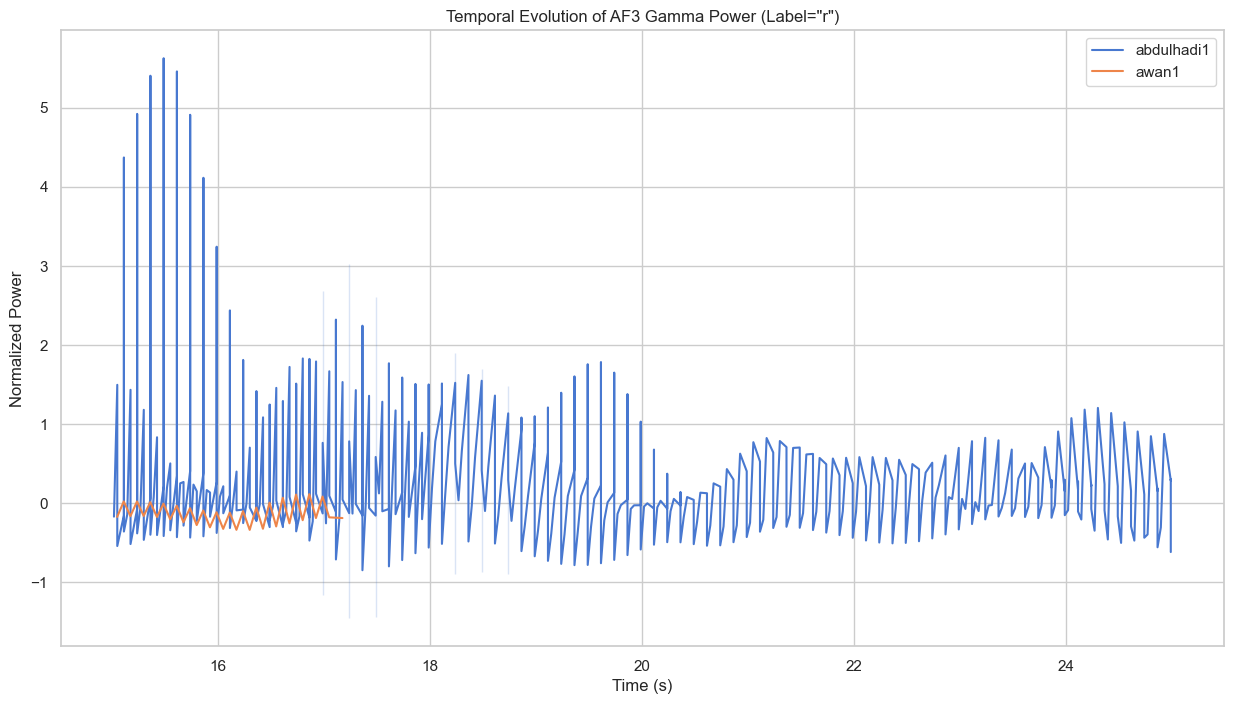

In [ ]:
# ## 5. Temporal Dynamics

# %%
def plot_temporal_evolution(label='r', electrode='AF4', band='Alpha'):
    """
    Plots the time course of a specified electrode-band for a given label,
    across all participants. If multiple trials exist, lineplot will show
    mean ± std by default. 
    """
    col = f'POW.{electrode}.{band}'
    if col not in full_df.columns:
        print(f"Column {col} not found in DataFrame.")
        return
    
    # Filter only relevant rows
    subset = full_df[(full_df['Label'] == label)]
    if subset.empty:
        print(f"No data for label='{label}'.")
        return
    
    # If 'RelativeTimestamp' not present, skip
    if 'RelativeTimestamp' not in subset.columns:
        print("No 'RelativeTimestamp' column found.")
        return
    
    plt.figure(figsize=(15,8))
    
    # We can hue by Participant or by Trial or both:
    sns.lineplot(
        x='RelativeTimestamp', 
        y=col,
        hue='Participant',
        data=subset,
        errorbar='sd'
    )
    
    plt.title(f'Temporal Evolution of {electrode} {band} Power (Label="{label}")')
    plt.xlabel('Time (s)')
    plt.ylabel('Normalized Power')
    plt.legend()
    plt.show()

# Example usage
if power_bands:
    plot_temporal_evolution('d', 'T7', 'BetaL')
    plot_temporal_evolution('r', 'AF3', 'Gamma')
    
'''This code snippet defines and uses a function to analyze the temporal dynamics of EEG power bands:

1. **Function Definition (`plot_temporal_evolution`)**:
   - **Purpose**: To plot the time evolution of power in a specified electrode and band for a given label across all participants.
   - **Parameters**: Accepts a `label`, `electrode`, and `band` to specify the data being visualized.

2. **Column Check**: 
   - Validates that the specified power band column (e.g., `POW.AF4.Alpha`) exists in the DataFrame.

3. **Data Filtering**:
   - Filters the dataset to include only rows for the specified `label`.
   - Checks for an empty subset or missing 'RelativeTimestamp', and skips plotting if either condition is met.

4. **Plotting**:
   - Uses a line plot to depict the average time course of normalized power, with each line representing a different participant for the specified label.
   - The plot shows mean ± standard deviation (captured by the `errorbar='sd'` parameter) to indicate variability around the mean.

5. **Example Usage**:
   - Calls the function to plot temporal evolution for specific label-electrode-band combinations (e.g., 'd-T7-BetaL' and 'r-AF3-Gamma'), visualizing how power changes over time.

This function provides insight into how power band dynamics change over time for specific cognitive or motor tasks, potentially revealing task-specific patterns.'''


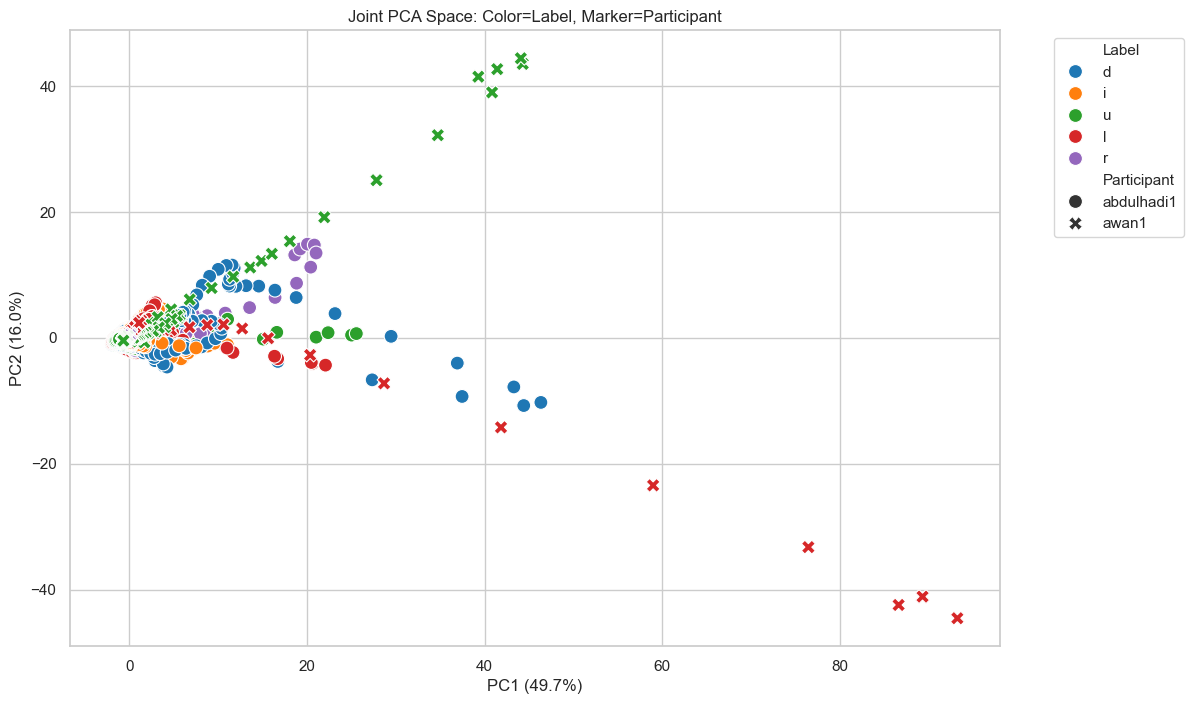

In [ ]:
# ## 6. Cross-Participant Consistency (PCA)

# %%
if power_bands:
    def plot_joint_pca():
        # Drop any rows that are entirely NaN in power bands (should be none if we filled, but just in case).
        df_pca = full_df.dropna(subset=power_bands)
        if df_pca.empty:
            print("No rows with valid power band data for PCA.")
            return
        
        # Scale (0-mean, unit variance)
        scaler = StandardScaler()
        X = scaler.fit_transform(df_pca[power_bands])
        
        # PCA in 2D
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(X)
        
        plt.figure(figsize=(12,8))
        sns.scatterplot(
            x=principal_components[:, 0],
            y=principal_components[:, 1],
            hue=df_pca['Label'].astype(str),
            style=df_pca['Participant'].astype(str),
            palette='tab10',
            s=100
        )
        var1 = pca.explained_variance_ratio_[0]*100
        var2 = pca.explained_variance_ratio_[1]*100
        plt.title('Joint PCA Space: Color=Label, Marker=Participant')
        plt.xlabel(f'PC1 ({var1:.1f}%)')
        plt.ylabel(f'PC2 ({var2:.1f}%)')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()
    
    plot_joint_pca()

'''This code snippet performs a Principal Component Analysis (PCA) to evaluate cross-participant consistency in EEG power band data:

1. **Check for Power Bands**: 
   - Proceeds with PCA only if power band columns exist in the data.

2. **Data Preparation**:
   - Drops any rows from `full_df` that are entirely NaN in power band columns, ensuring valid data for PCA.

3. **Standardize Data**:
   - Uses `StandardScaler` to normalize the power band features to have zero mean and unit variance, which is a common preprocessing step for PCA.

4. **Apply PCA**:
   - Performs PCA to reduce the dimensionality of the normalized power band data to two principal components.

5. **Visualization**:
   - Creates a 2D scatter plot of the first two principal components.
   - Color-codes points by 'Label' and styles them by 'Participant', allowing visualization of both categorical variables on the same plot.
   - Labels the axes with the percentage of variance explained by each principal component (PC1 and PC2).

6. **Output**:
   - Displays the scatter plot, which helps assess whether data from different labels or participants cluster together or overlap, indicating potential consistency or variance among participants and conditions.

This PCA visualization aids in understanding how EEG features from different subjects and tasks compare in a reduced-dimension space, helping identify patterns or distinctions in power band data.'''

In [ ]:
# ## 7. Statistical Significance

# %%
if power_bands:
    results = []
    all_labels = full_df['Label'].unique()
    
    # We only do ANOVA if there are at least two participants
    if len(participant_folders) == 2:
        for label in all_labels:
            # For each power band
            for band_col in power_bands:
                # Grab data from participant 0
                group1 = full_df[
                    (full_df['Label'] == label) &
                    (full_df['Participant'] == participant_folders[0])
                ][band_col].dropna()
                
                # Grab data from participant 1
                group2 = full_df[
                    (full_df['Label'] == label) &
                    (full_df['Participant'] == participant_folders[1])
                ][band_col].dropna()
                
                # If one group or both are empty (or only 1 sample),
                # f_oneway will fail. We skip in that case.
                if len(group1) < 2 or len(group2) < 2:
                    continue
                
                f_val, p_val = stats.f_oneway(group1, group2)
                results.append({
                    'Label': label,
                    'Band': band_col,
                    'F_value': f_val,
                    'p_value': p_val
                })
        
        stats_df = pd.DataFrame(results)
        if not stats_df.empty:
            # Bonferroni correction
            alpha = 0.05
            alpha_corrected = alpha / len(stats_df)
            sig_df = stats_df[stats_df['p_value'] < alpha_corrected]
            
            print("Significant Band-Label Associations:")
            if sig_df.empty:
                print("None found (after Bonferroni correction).")
            else:
                print(sig_df.sort_values('p_value').head(10))
        else:
            print("No valid data for ANOVA (groups too small or missing).")
    else:
        print("ANOVA example only works with exactly 2 participants. Skipping.")
else:
    print("No power bands found, skipping statistical analysis.")
    
'''This code snippet conducts a statistical significance test (ANOVA) on the power band data to identify differences between two participants.

1. **Preconditions**: 
   - The analysis is only performed if power band columns are present and there are exactly two participants specified.

2. **Setup**:
   - Initializes an empty list `results` to store ANOVA results.
   - Identifies all unique labels in the dataset.

3. **ANOVA Testing**:
   - For each label and power band, retrieves the power band values for each participant.
   - Conducts a one-way ANOVA (`stats.f_oneway`) to test for significant differences between the two groups (participants) for each label and band.
   - Only performs ANOVA if each group has at least 2 samples to prevent errors.

4. **Results Aggregation**:
   - Stores the F-values and p-values for each test in the `results` list, which is then converted into `stats_df`, a DataFrame of all test results.

5. **Significance Correction**:
   - Applies a Bonferroni correction to account for multiple comparisons, adjusting the significance threshold.

6. **Output**:
   - Prints any statistically significant results (e.g., those with p-values below the adjusted threshold).
   - If no significant results found, or data is unsuitable for ANOVA (e.g., missing groups or power bands), it prints appropriate messages.

This analysis helps to identify which power bands and labels show significant differences between the two participants, potentially highlighting task-relevant neural activity patterns.'''

No valid data for ANOVA (groups too small or missing).


6612


/Users/awabrizwan/Desktop/FAST/4th Sem/Thesis/Sample framework/thesis-brain-signal-processing/venv/lib/python3.13/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/awabrizwan/Desktop/FAST/4th Sem/Thesis/Sample framework/thesis-brain-signal-processing/venv/lib/python3.13/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


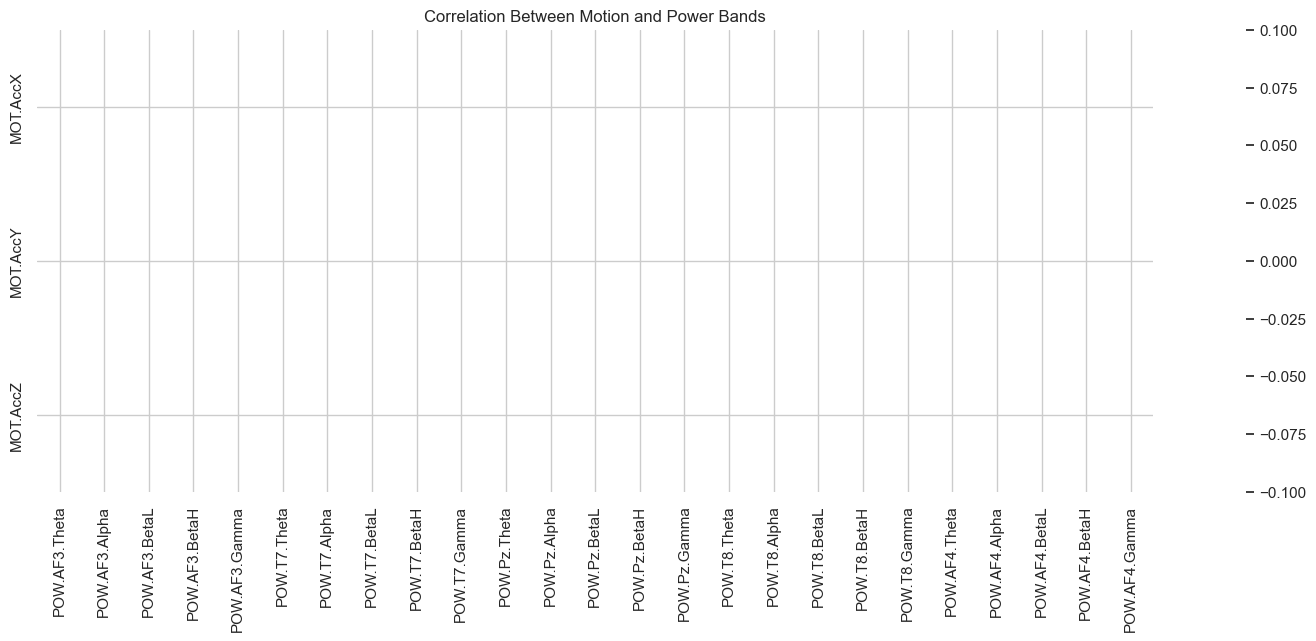

Notebook finished successfully!


In [ ]:
# ## 8. Motion Artifact Analysis

# %%
motion_cols = [c for c in full_df.columns if c.startswith('MOT.')]
if motion_cols and power_bands:
    # Just ensure we don't have all-NaNs
    df_motion = full_df[motion_cols + power_bands].dropna(how='all')
    
    if df_motion.empty:
        print("All NaN in motion or power band columns. Skipping analysis.")
    else:
        print(len(df_motion))
        corr_df = df_motion.corr()
        
        # Focus on correlation between motion and power bands
        # e.g. AccX, AccY, AccZ
        motion_acc_cols = [m for m in motion_cols if 'Acc' in m]
        relevant_motion = [m for m in motion_acc_cols if m in corr_df.index]
        
        power_subset = [p for p in power_bands if p in corr_df.columns]
        
        if relevant_motion and power_subset:
            plt.figure(figsize=(18,6))
            sns.heatmap(
                corr_df.loc[relevant_motion, power_subset],
                cmap='icefire',
                center=0,
                annot=False
            )
            plt.title('Correlation Between Motion and Power Bands')
            plt.show()
        else:
            print("No matching motion or power band columns in correlation matrix.")
else:
    print("No motion or power band columns found. Skipping motion artifact analysis.")


# %%
print("Notebook finished successfully!")

'''This code snippet performs an analysis to examine correlations between motion artifacts and power band data within the EEG dataset:

1. **Identify Relevant Columns**:
   - Gathers column names starting with 'MOT.' for motion data and 'POW.' for power bands.

2. **Data Preparation**:
   - Combines motion and power band columns into a new DataFrame `df_motion`, dropping rows that are entirely NaN.

3. **Missing Data Check**:
   - If `df_motion` is empty (i.e., all motion or power band data is missing), it skips the analysis with a message.

4. **Compute Correlations**:
   - Computes a correlation matrix (`corr_df`) for the available columns in `df_motion`.
   - Focuses on correlations involving motion acceleration components (e.g., AccX, AccY, AccZ) with power band data.

5. **Visualization**:
   - If applicable motion and power band columns are present in the correlation matrix:
     - Creates a heatmap to visualize these correlations, highlighting how motion artifacts might impact power band readings.
   - Displays correlation strengths with a color gradient (cmap='icefire') centered at 0 for easy identification of positive/negative correlations.

6. **Output**:
   - If no relevant correlations are found, or if necessary columns are missing, it outputs appropriate messages.
   - Concludes with a success message if the notebook runs through to completion without issues.

This analysis helps assess the potential influence of motion artifacts on EEG power spectra, which is crucial for ensuring accurate signal interpretation.'''